In [1]:
# In[1]:


from qlab import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
DIM=3


# In[2]:
gp_filename="./nl12_M400_Nsnap100/gp_Si_soap.xml"
Snapshots_examined="./Si_p555_T300_Nsnap100.xyz"
out_GAP_Snapshots="Si_T300_gap.xyz"

at_Snapshots=AtomsList(Snapshots_examined) #quippy.io.AtomsList("prim_md.xyz")
(Nsteps,Natms)=shape(at_Snapshots)
F_DFT=np.zeros(Nsteps*Natms*DIM)   


# In[3]:


istep=0
for at in at_Snapshots:
    for iat in np.arange(0,Natms):
        for idim in np.arange(0,DIM):
            F_DFT[istep*DIM*Natms+iat*DIM+idim]=at.force[iat+1][idim+1]
    istep+=1


# In[4]:


E_DFT=np.array(at_Snapshots.energy)
E_GAP=np.zeros(shape(E_DFT))
F_GAP=np.zeros(Nsteps*Natms*DIM)


# In[5]:



out = AtomsWriter(out_GAP_Snapshots) #quippy.io.AtomsWriter('Bi_GAP.xyz')



# In[6]:


energy_i = np.farray(0.0)
force_i = np.farray(np.zeros(at_Snapshots[0].force.shape))
pot=quippy.Potential("IP GAP",param_filename=gp_filename)
istep=0
iforc=0
for at in at_Snapshots:
    #at.energy
    pot.calc(at,energy=energy_i,force=force_i)
    at.force=force_i
    at.energy=energy_i
    E_GAP[istep]=energy_i
    for iat in np.arange(0,Natms):
        for idim in np.arange(0,3): # int array [0,3)
             F_GAP[istep*Natms*DIM+iat*DIM+idim]=force_i[iat+1][idim+1]
    out.write(at)
    istep+=1
out.close()

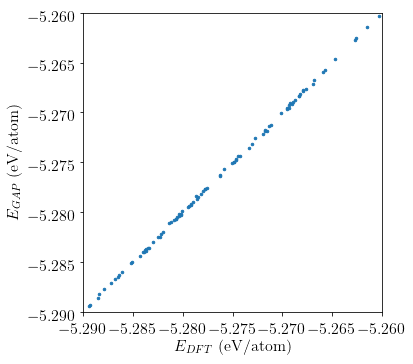

In [2]:
plt.plot(E_DFT/Natms,E_GAP/Natms,linestyle='none',marker='.',color='C0',markersize=5)
plt.xlabel("$E_{DFT}$ (eV/atom)",fontsize=16)
plt.ylabel("$E_{GAP}$ (eV/atom)",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(np.around(np.min(E_DFT/Natms),decimals=2),np.around(np.max(E_DFT/Natms),decimals=2))
plt.ylim(np.around(np.min(E_DFT/Natms),decimals=2),np.around(np.max(E_DFT/Natms),decimals=2))
plt.gca().set_aspect('equal',adjustable='box')
plt.gcf().set_size_inches(5.5, 5.5)
plt.savefig("Egap_vs_Edft.png",dpi=300,bbox_inches='tight')

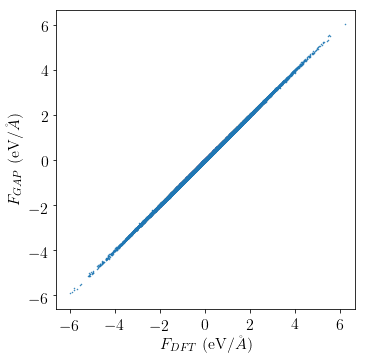

In [3]:
plt.plot(F_DFT,F_GAP,linestyle='none',marker='.',color='C0',markersize=1)
plt.xlabel("$F_{DFT}$ (eV/$\AA$)",fontsize=16)
plt.ylabel("$F_{GAP}$ (eV/$\AA$)",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(np.around(np.min(F_DFT),decimals=2),np.around(np.max(F_DFT),decimals=2))
plt.ylim(np.around(np.min(F_DFT),decimals=2),np.around(np.max(F_DFT),decimals=2))
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(5.5, 5.5)
plt.savefig("Fgap_vs_Fdft.png",dpi=300,bbox_inches='tight')

In [4]:
RMSE_E = np.sqrt(np.sum((E_DFT/Natms-E_GAP/Natms)**2)/len(E_DFT))
print RMSE_E

0.00011438663418593802


In [5]:
RMSE_F = np.sqrt(np.sum((F_DFT-F_GAP)**2)/len(F_DFT))
print RMSE_F

0.020732605631884806


In [6]:
MAE_E = np.sum(np.abs(E_DFT/Natms-E_GAP/Natms))/len(E_DFT)
print MAE_E

9.038361160707886e-05


In [7]:
MAE_F = np.sum(np.abs(F_DFT-F_GAP))/len(F_DFT)
print MAE_F

0.01644214337995062
